![](https://i.imgur.com/VxwKjYQ.gif)

### Why EDA is important ?

Usually we start any data science project with understanding the business problem and then we generate hypothesis. During hypothesis generation we look for factors which influence our dependent variable. EDA helps in confirming and validating those hypothesis.

It helps to find out unexpected pattern in data which must be taken into account, thereby suggesting some changes in planned analysis.

It helps in delivering data driven insights to business stakeholders by confirming they are asking the right questions and not biasing the investigation with their assumptions.

### How to EDA
I divide exploratory data analysis in 3 parts of investigation. 

1. *Structure Investigation* : Exploring shape and as well as data types.  
2. *Quality Investigation* : To check general quality of datasets in regard to duplicates,missing values and unwanted entries.  
3. *Content Investigation* : More indepth study of features and how they relate to each other.  

### Example Case

Let's download some data and perform eda to bring insights as well know quality of the data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363238,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,1.0,3.0,0.0,0.0,2.0,0.0,0.0,9.0,1.0,NaN
363239,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0
363240,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
363241,2015984141415,13.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,NaN


### Structure Investigation

In [2]:
df_X.shape

(363243, 67)

In [3]:
import pandas as pd
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

### Structure of Non Numerical Features

In [4]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [5]:
# Changes data type of 'Sex_of_Driver'
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

In [6]:
df_X.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


### Structure of Numerical Features

In [7]:
# from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# import matplotlib.image as mpimg
# def insert_image(path, zoom, xybox, ax):
#     '''Insert an image within matplotlib'''
#     imagebox = OffsetImage(mpimg.imread(path), zoom=zoom)
#     ab = AnnotationBbox(imagebox, xy=(0.5, 0.7), frameon=False, pad=1, xybox=xybox)
#     ax.add_artist(ab)



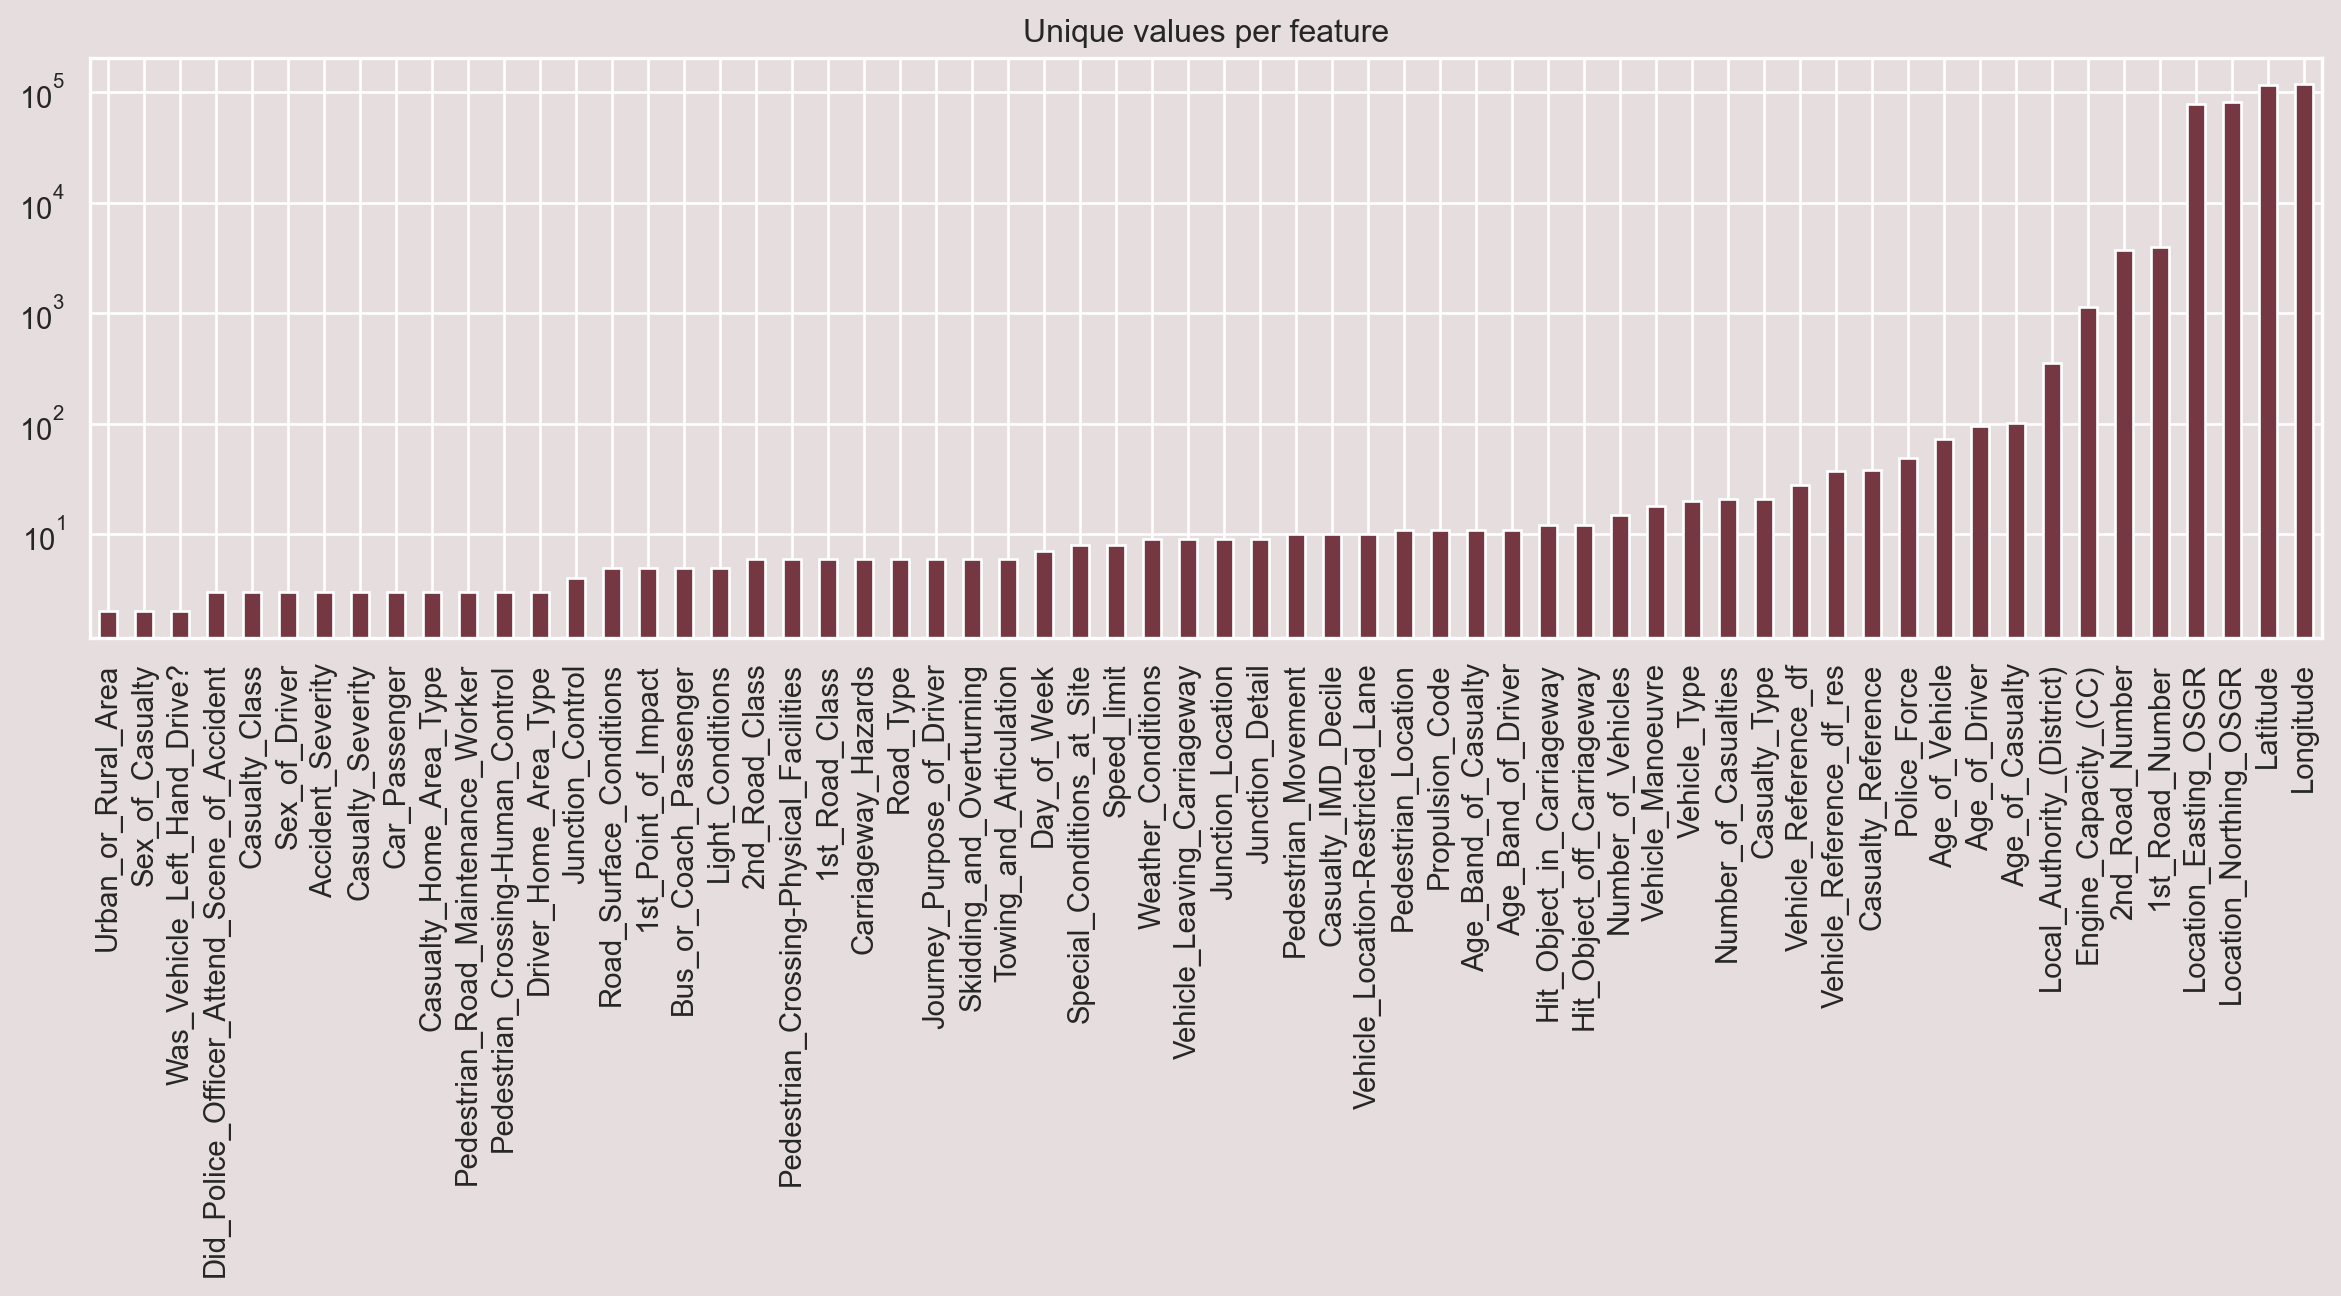

In [8]:
#| column: body
# For each numerical feature compute number of unique entries
sns.set(rc={'axes.facecolor':'#e6ddde', 'figure.facecolor':'#e6ddde'})

fig, ax = plt.subplots(figsize=(10, 8))

unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature",  color='#753742');

### Quality Investigation

In [9]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [10]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

### Missing Values

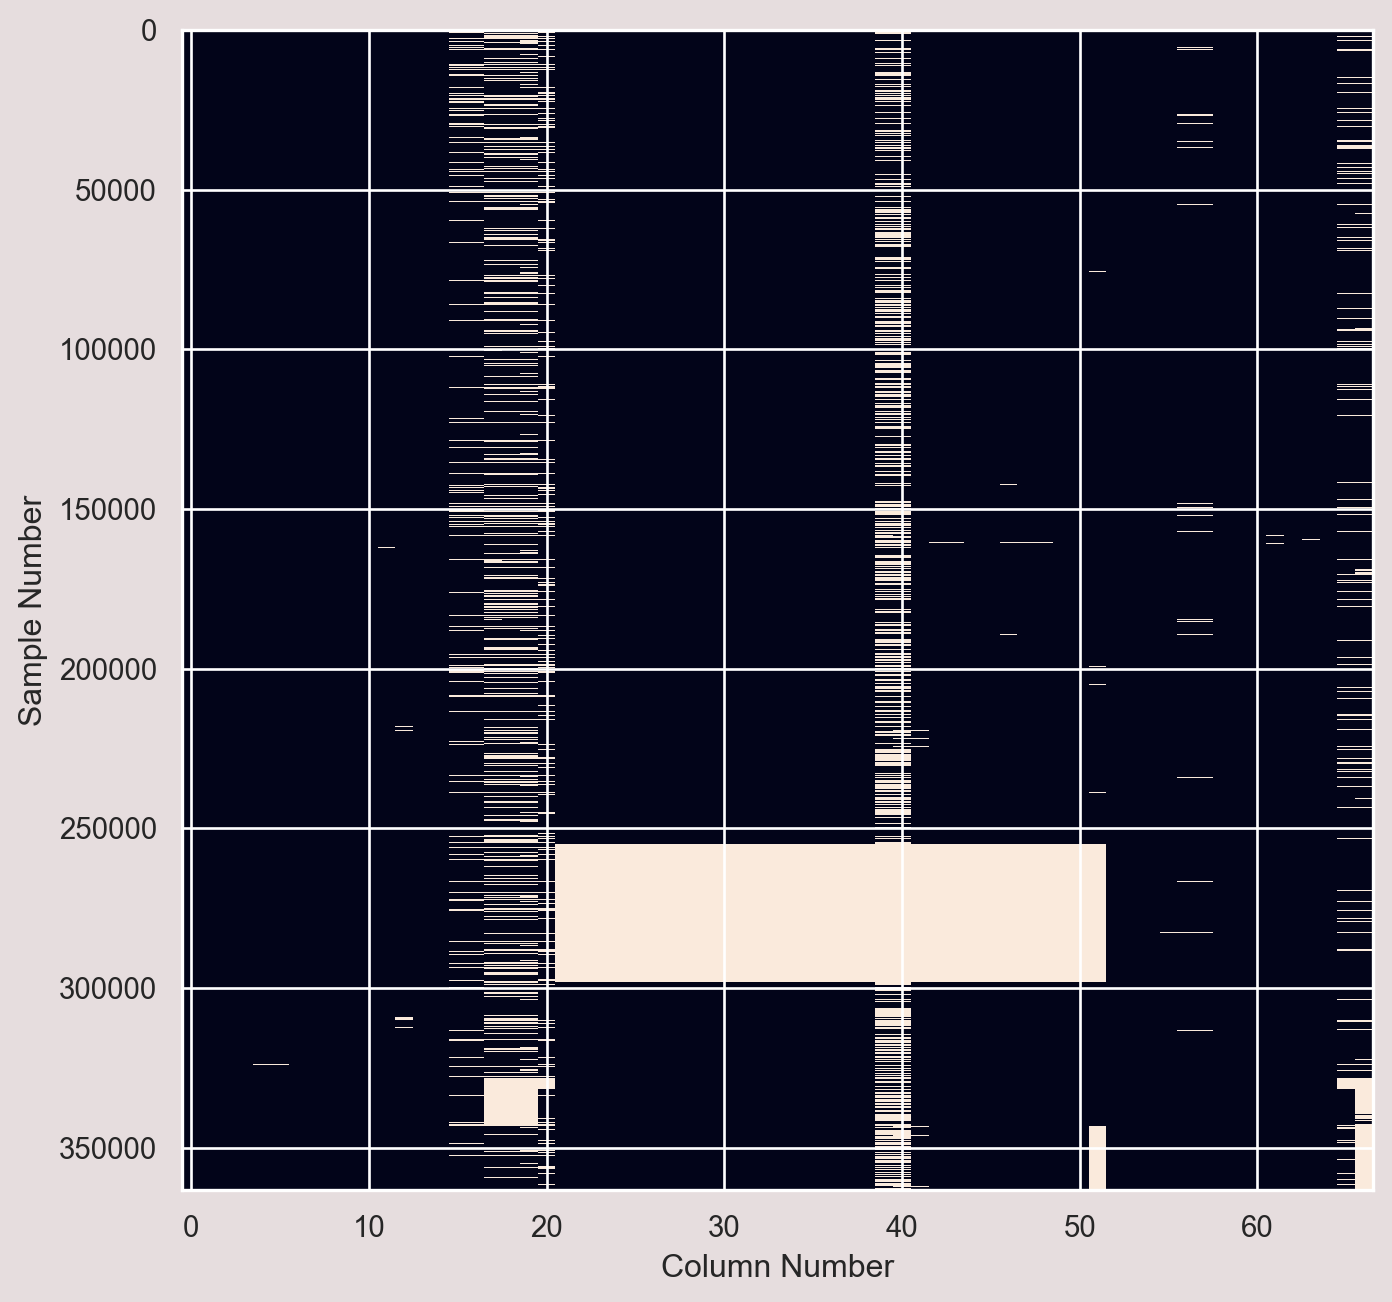

In [11]:
import matplotlib.pyplot as plt
# For each numerical feature compute number of unique entries
sns.set(rc={'axes.facecolor':'#e6ddde', 'figure.facecolor':'#e6ddde'})
plt.figure(figsize=(8, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");